In [1]:
using Random, Distributions, Statistics, Plots
gr() 

Plots.GRBackend()

In [36]:
#maqモデル
function extract_y_t(y_t_array,k)
    if k <= length(y_t_array)
        return y_t_array[(length(y_t_array)+1-k)]
    else
        return 0
    end
end

function arma_pq(y_0, c, sigma, phi_array, theta_array, y_length)
    prepend!([1.0], theta_array)
    y_t_array = []
    noise_array = rand(Normal(0,sigma) , y_length)
    for i in 1:y_length
        if i == 0
            append!(y_t_array,y_0)
        else
            y_t = 0
            if i < length(theta_array)
                t = i
            else
                t =  length(theta_array)
            end
            for j in 1:length(phi_array)
                y_t += phi_array[j]*extract_y_t(y_t_array,j)
            end
            append!(y_t_array,c+y_t+sum([noise_array[i-(k-1)]*theta_array[k] for k in 1:t]))
        end
    end
    return y_t_array
end

#k次の自己共分散の値を計算
function autocovariance(k, ma1_array)
    auto_cov = Statistics.cov(ma1_array[1:(size(ma1_array)[1])-k],ma1_array[1+k:(size(ma1_array)[1])],corrected = false)
    return auto_cov
end

#k次の自己相関の値を計算
function autocorrelation(k, ma1_array)
    k_0 = autocovariance(0, ma1_array)
    k_k = autocovariance(k, ma1_array)
    return k_k/k_0
end

plot_correlogram (generic function with 1 method)

上の段： [0.5]　下の段： [1.2]

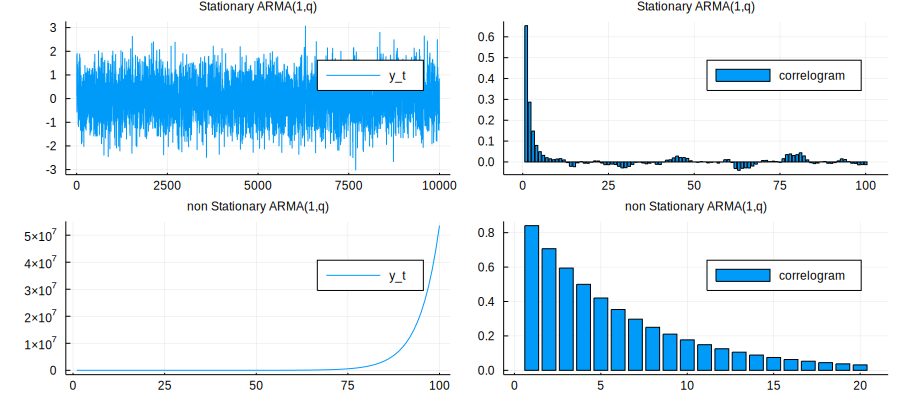

In [93]:
#AR(1)非定常
#AR(1)定常
print("上の段： [0.5]　下の段： [1.2]")
arma_1_s = arma_pq(0, 0, 1, [0.5],  [-0.3,-0.5,0.1], 10000)
arma_1_ns = arma_pq(0, 0, 1, [1.2],  [-0.3,-0.5,0.1], 100)
y_1_s = plot(arma_1_s,title="Stationary ARMA(1,q)",label="y_t",titlefont=font(8),legendfont=font(8))
corr_1_s = plot([autocorrelation((i),arma_1_s) for i in 1:100],st=:bar,title="Stationary ARMA(1,q)",label="correlogram",titlefont=font(8),legendfont=font(8))
y_1_ns = plot(arma_1_ns,title="non Stationary ARMA(1,q)",label="y_t",titlefont=font(8),legendfont=font(8))
corr_1_ns = plot([autocorrelation((i),arma_1_ns) for i in 1:20],st=:bar,title="non Stationary ARMA(1,q)",label="correlogram",titlefont=font(8),legendfont=font(8))
plot(y_1_s,corr_1_s,y_1_ns,corr_1_ns,layout=(2,2),size=(900,400))

上の段： [0.5,0.3]　下の段： [0.5,0.6]

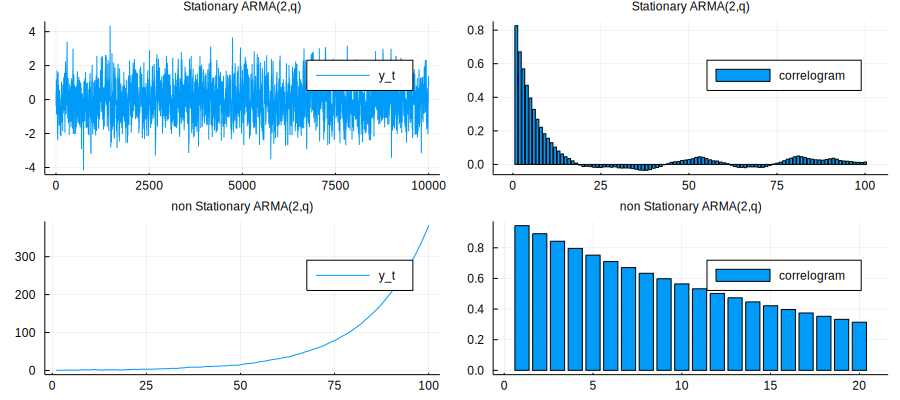

In [90]:
#AR(2)非定常
#AR(2)定常
print("上の段： [0.5,0.3]　下の段： [0.5,0.6]")
arma_2_s = arma_pq(0, 0, 1, [0.5,0.3],  [-0.3,-0.5,0.1], 10000)
arma_2_ns = arma_pq(0, 0, 1, [0.5,0.6],  [-0.3,-0.5,0.1], 100)
y_2_s = plot(arma_2_s,title="Stationary ARMA(2,q)",label="y_t",titlefont=font(8),legendfont=font(8))
corr_2_s = plot([autocorrelation((i),arma_2_s) for i in 1:100],st=:bar,title="Stationary ARMA(2,q)",label="correlogram",titlefont=font(8),legendfont=font(8))
y_2_ns = plot(arma_2_ns,title="non Stationary ARMA(2,q)",label="y_t",titlefont=font(8),legendfont=font(8))
corr_2_ns = plot([autocorrelation((i),arma_2_ns) for i in 1:20],st=:bar,title="non Stationary ARMA(2,q)",label="correlogram",titlefont=font(8),legendfont=font(8))
plot(y_2_s,corr_2_s,y_2_ns,corr_2_ns,layout=(2,2),size=(900,400))